In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline

sns.reset_defaults()
sns.set_theme(rc={'figure.dpi': 72, 'savefig.dpi': 300,
              'figure.autolayout': True})
sns.set_style('ticks')
sns.set_context('paper')

In [21]:
def ErdosRenyi(n: int, m: int, seed: int = 2) -> dict:
    """Erdos-Renyi Random Graph

    Args:
        n (int): Number of vertices.
        m (int): Number of edges.
        seed (int, optional): Defaults to 2.

    Returns:
        dict: Adjacency list.
    """
    random.seed(seed)
    V = {i: set() for i in range(n)}
    for i in range(m):
        u, v = random.sample(list(V.keys()), k=2)
        V[u].add(v)
        V[v].add(u)
    return V


def SmallWorld(n: int, m: int, p: float, seed: int = 2) -> dict:
    """Small-World Model (Watts-Strogatz)

    Args:
        n (int): Number of vertices.
        m (int): Number of edges.
        p (float): Randomness probability.
        seed (int, optional): Defaults to 2.

    Returns:
        dict: Adjacency list.
    """
    random.seed(seed)
    V = {i: set() for i in range(n)}
    E = set()

    # Create a ring as the lattice.
    mcnt = 0
    i = 0
    k = 0
    while True:
        if mcnt >= m:
            break
        if i == 0:
            k += 1
        j = (i + k) % n
        V[i].add(j)
        V[j].add(i)
        E.add(frozenset((i, j)))
        mcnt += 1
        i = (i + 1) % n

    # Rewire
    for i, j in E:
        if random.random() > p:
            continue
        k = random.sample(list(V.keys()), k=1)[0]
        if frozenset((i, k)) in E:
            continue
        V[i].remove(j)
        V[j].remove(i)
        V[i].add(k)
        V[k].add(i)
    return V


def ReadUG(file_path: str, sep: str = None) -> dict:
    """Read Undirected Graph

    Returns:
        dict: Adjacency list.
    """
    V = {}
    with open(file_path) as f:
        for l in f:
            try:
                u, v = map(int, l.split(sep))
            except:
                continue
            V.setdefault(u, set()).add(v)
            V.setdefault(v, set()).add(u)
    return V


def deg_dist(V: dict) -> dict:
    """Degree Distribution

    Args:
        V (dict): Adjacency list.

    Returns:
        dict: <k: N_k/N>
    """
    degs = list(map(lambda k: len(V[k]), V))
    return {d: degs.count(d)/len(V) for d in degs}


def ccm(V: dict) -> float:
    """Clustering Coefficient Mean

    Args:
        V (dict): Adjacency list.

    Returns:
        float: Mean of Clustering Coefficient.
    """
    C = []
    for i in V:
        ei = 0
        ki = len(V[i])
        if ki < 2:
            continue
        for j in V[i]:
            for k in V[j]:
                if k in V[i]:
                    ei += 1
        C.append(ei / (ki * (ki-1)))
    return sum(C) / len(C)


Erdos-Renyi's Clustering Coefficient: 0.0008
Small-World's Clustering Coefficient: 0.2861
LastFM Asia's Clustering Coefficient: 0.2850


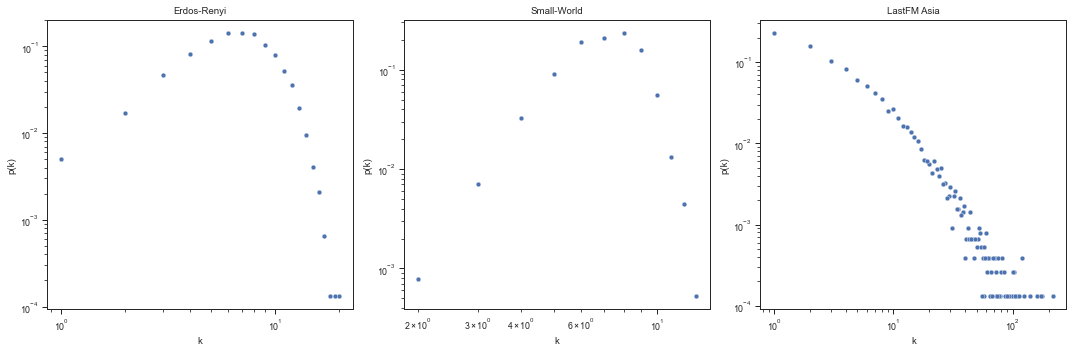

In [22]:
graphs = (
    ('Erdos-Renyi', ErdosRenyi(7624, 27806)),
    ('Small-World', SmallWorld(7624, 27806, 0.24)),
    ('LastFM Asia', ReadUG('datasets/lastfm_asia.csv', ',')),
)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, (l, V) in enumerate(graphs):
    print(f"{l}'s Clustering Coefficient: {ccm(V):.4f}")
    dd = deg_dist(V)
    sns.scatterplot(x=dd.keys(), y=dd.values(), ax=ax[i])
    ax[i].set(xscale="log", yscale="log", title=l, xlabel="k", ylabel="p(k)")
fig.savefig('q1.png')
fig
